การทำ Binary classification จาก Spaceship Titanic dataset ซึ่งโมเดลนี้มีวัตถุประสงค์ที่จะทำนายว่าผู้โดยสารที่เข้าร่วมเดินทางบนเรือโดยสาร Spaceship Titanic คนไหนบ้างที่จะถูกย้ายไปยังมิติอื่น

ซึ่งรายละเอียดของตัว dataset ที่เป็นFeaturesต่างๆที่ใช้ในการทำนาย มีดังนี้
- PassengerId คือ รหัสประจำตัวของผู้โดยสารแต่ละคน โดยจะอยู่ในรูปแบบ gggg_pp เช่น 0123_55 เป็นต้น ซึ่ง gggg นั้นบ่งบอกถึงกลุ่มของผู้โดยสาร และ pp หมายถึงหมายเลขของผู้โดยสารคนนั้น ๆ ในกลุ่ม โดยส่วนใหญ่ผู้โดยสารในกลุ่มเดียวกันมักเป็นครอบครัวเดียวกันแต่ก็ไม่เสมอไป
- HomePlanet คือ ดาวเคราะห์ที่ผู้โดยสารขึ้นยานมา โดยทั่วไปแล้วจะเป็นดาวเคราะห์บ้านเกิดด้วย
- CryoSleep คือ ค่าที่ไว้บอกว่าผู้โดยสารคนนั้นนอนในแคปซูลแบบ Cryo Sleep ในห้องโดยสารของพวกเขาหรือไม่
- Cabin คือ หมายเลขห้องโดยสาร จะอยู่ในรูปแบบ deck/num/side เช่น A/2/P เป็นต้น โดย side นั้นจะเป็นมีแค่ P (Port) หรือ S (Starboard) เท่านั้น
- Destination คือ จุดหมายปลายทางที่ผู้โดยสารจะเดินทางไป
- Age คือ อายุของผู้โดยสาร
- VIP คือ ระบุถึงสถานะของผู้โดยสารว่าได้จ่ายเงินเพื่อบริการแบบ VIP หรือไม่
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck คือค่าใช้จ่ายที่ผู้โดยสารถูกเรียกเก็บจากการใช้งานสิ่งอำนวยความสะดวกบนยาน
- Name คือ ชื่อและนามสกุลของผู้โดยสาร

ค่าที่ต้องการทำนาย

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', font_scale=1.4)
from tqdm.auto import tqdm

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train['isTrain'] = 'Yes'
test['isTrain'] = 'No'

In [4]:
tt = pd.concat([train, test]) #.drop('Transported', axis = 1)
tt

/Users/suthatipchaithap/miniforge3/envs/env_tf/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/suthatipchaithap/miniforge3/envs/env_tf/lib/python3.9/site-packages/IPython/core/formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,isTrain
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Yes
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Yes
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Yes
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Yes
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,No
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,No
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,No
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,No


True     4378
False    4315
Name: Transported, dtype: int64


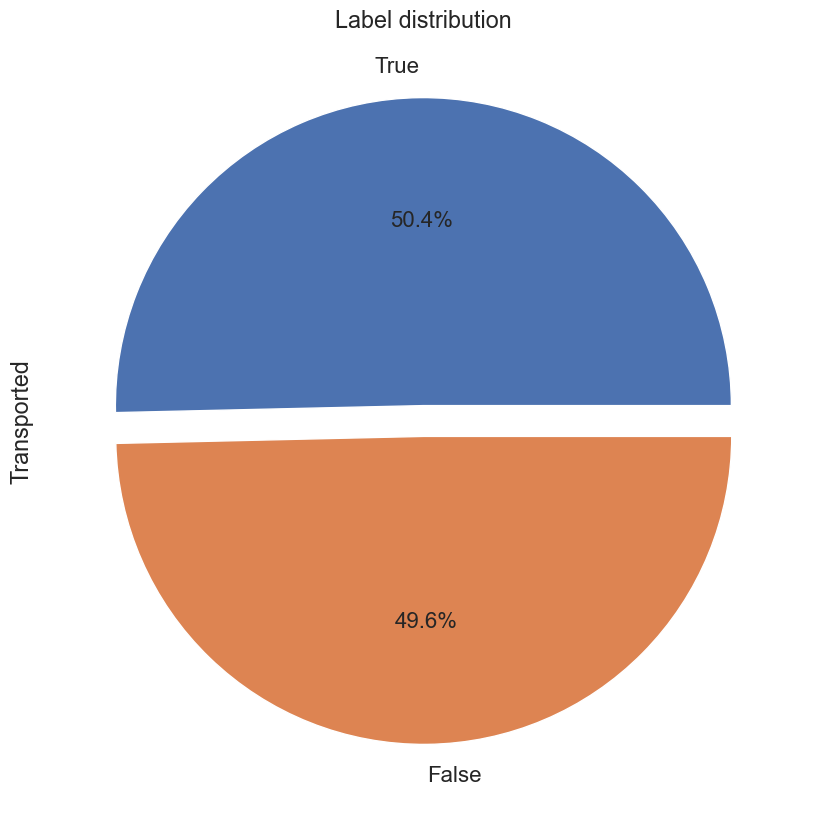

In [5]:
plt.figure(figsize=(10,10))

# Pie plot
train['Transported'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Label distribution")
print(train['Transported'].value_counts())

Text(0.5, 0, 'Age (years)')

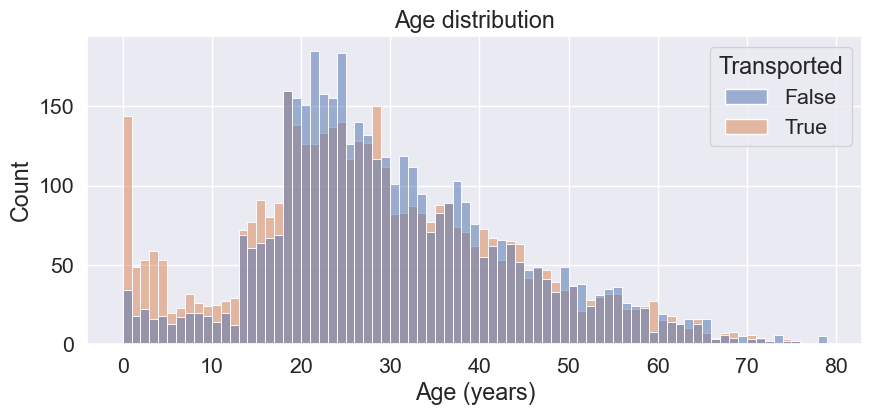

In [6]:
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age',hue='Transported', binwidth=1, kde=False)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

In [7]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
tt['Total_exp']=tt[exp_feats].sum(axis=1)
train['Total_exp']=train[exp_feats].sum(axis=1)
expenditure_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_exp']

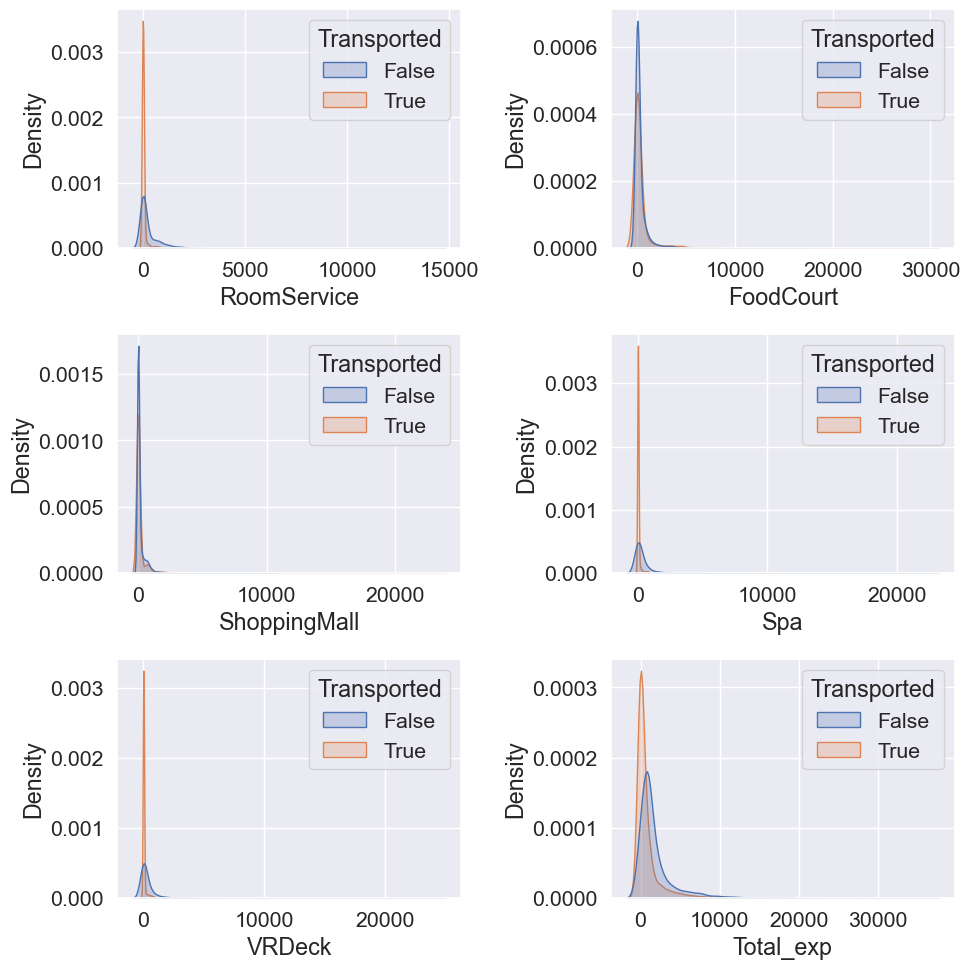

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
expenditure_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_exp']
# Iterating through axes and names
for name, ax in zip(expenditure_cols, axes.flatten()):
    sns.kdeplot(data=train, x=name, fill=True, hue="Transported", ax=ax)

plt.tight_layout()

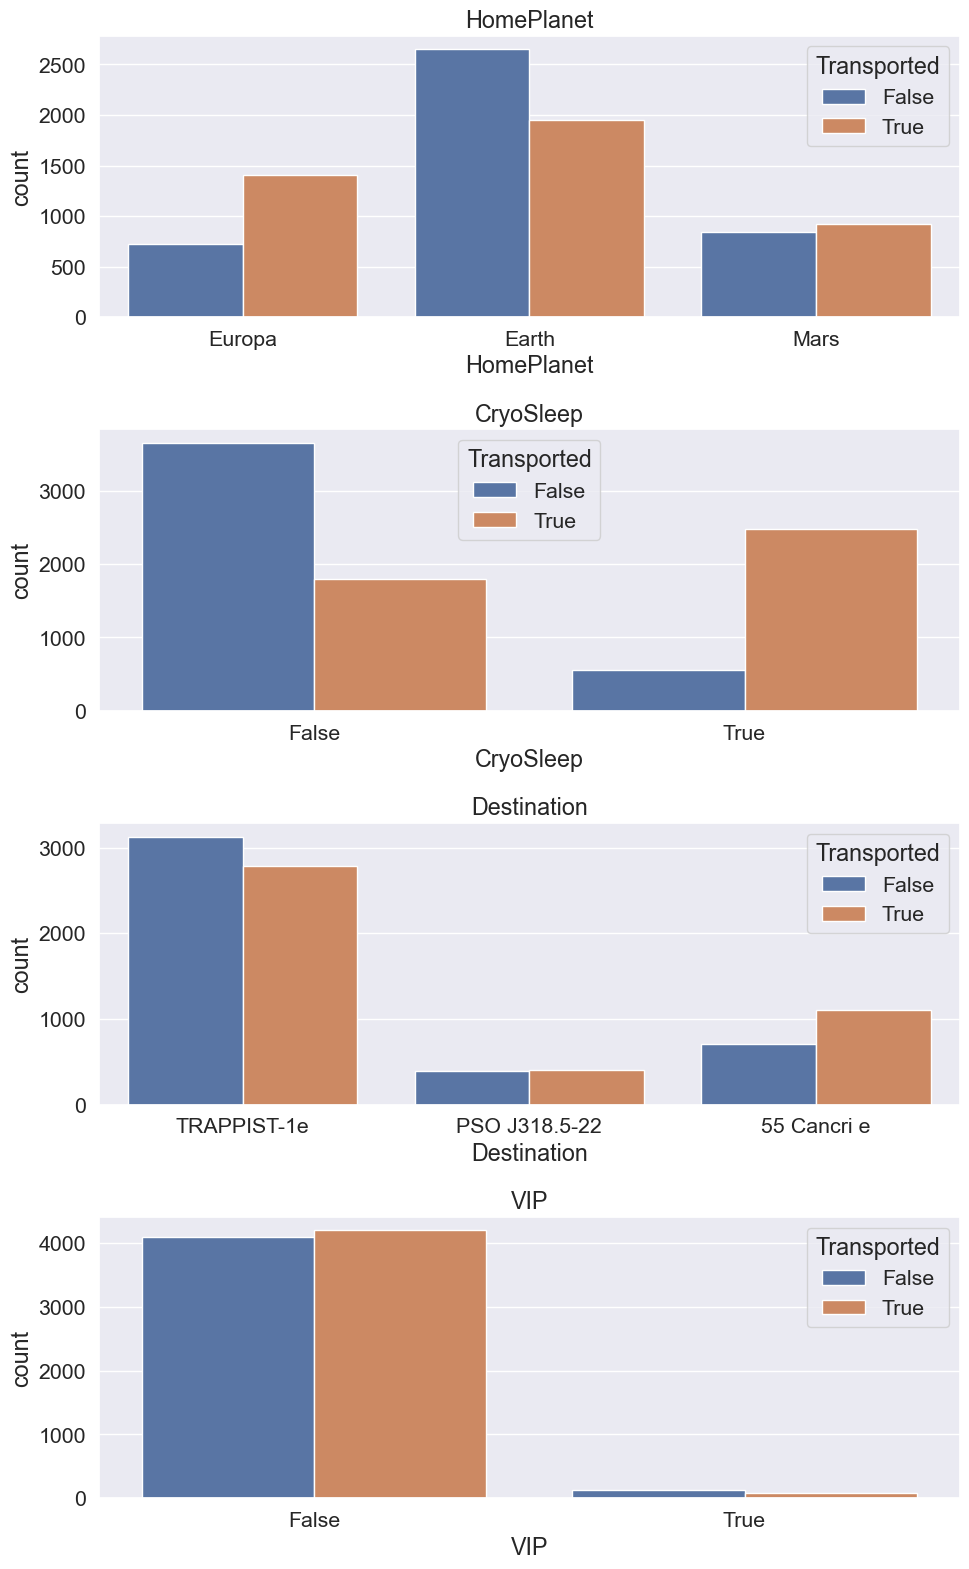

In [9]:
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)


fig.tight_layout()  # Improves appearance a bit
plt.show()

In [10]:
tt['Cabin_splt'] = tt['Cabin'].apply(lambda x : str(x).split(sep = '/'))
train['Cabin_splt'] = train['Cabin'].apply(lambda x : str(x).split(sep = '/'))

tt['Cabin_deck'] = tt['Cabin_splt'].apply(lambda x : np.nan if x[0] == 'nan' else x[0])
tt['Cabin_num'] = tt['Cabin_splt'].apply(lambda x : np.nan if x[0] == 'nan' else x[1])
tt['Cabin_side'] = tt['Cabin_splt'].apply(lambda x : np.nan if x[0] == 'nan' else x[2])
train['Cabin_deck'] = train['Cabin_splt'].apply(lambda x : np.nan if x[0] == 'nan' else x[0])
train['Cabin_num'] = train['Cabin_splt'].apply(lambda x : np.nan if x[0] == 'nan' else x[1])
train['Cabin_side'] = train['Cabin_splt'].apply(lambda x : np.nan if x[0] == 'nan' else x[2])

train['Cabin_num'] = train['Cabin_num'].astype('float') #เปลี่ยนเป็น float เพื่อนำไป visualize

tt = tt.drop(['Cabin_splt'], axis = 1)
train = train.drop(['Cabin_splt'], axis = 1)
train[['Cabin_deck','Cabin_num','Cabin_side']]

,Cabin_deck,Cabin_num,Cabin_side
0,B,0.0,P
1,F,0.0,S
2,A,0.0,S
3,A,0.0,S
4,F,1.0,S
...,...,...,...
8688,A,98.0,P
8689,G,1499.0,S
8690,G,1500.0,S
8691,E,608.0,S


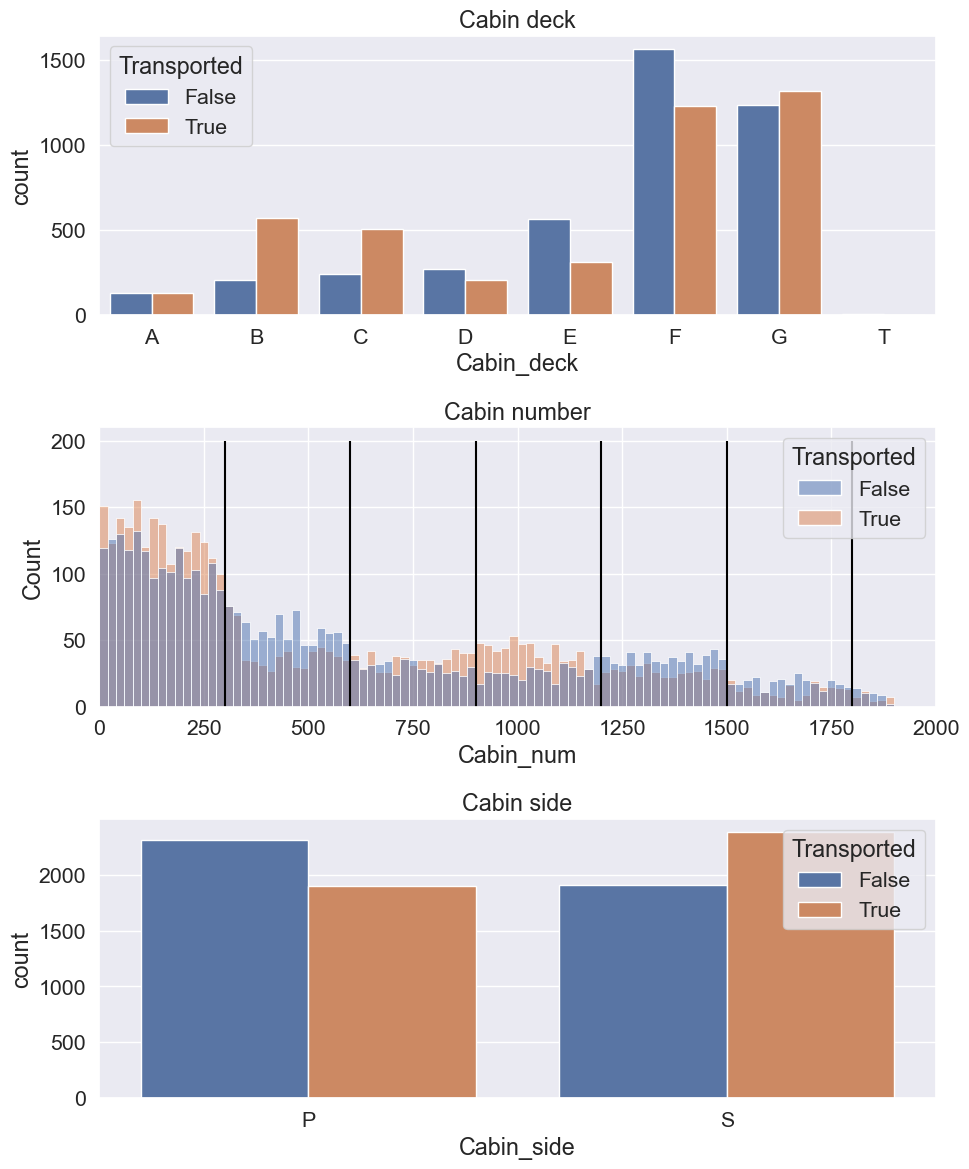

In [11]:
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train, x='Cabin_num', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

In [12]:
tt[["Pid1_", 'Pid2_']] = tt["PassengerId"].str.split('_', expand=True).astype('int')
train[["Pid1_", 'Pid2_']] = train["PassengerId"].str.split('_', expand=True).astype('int')

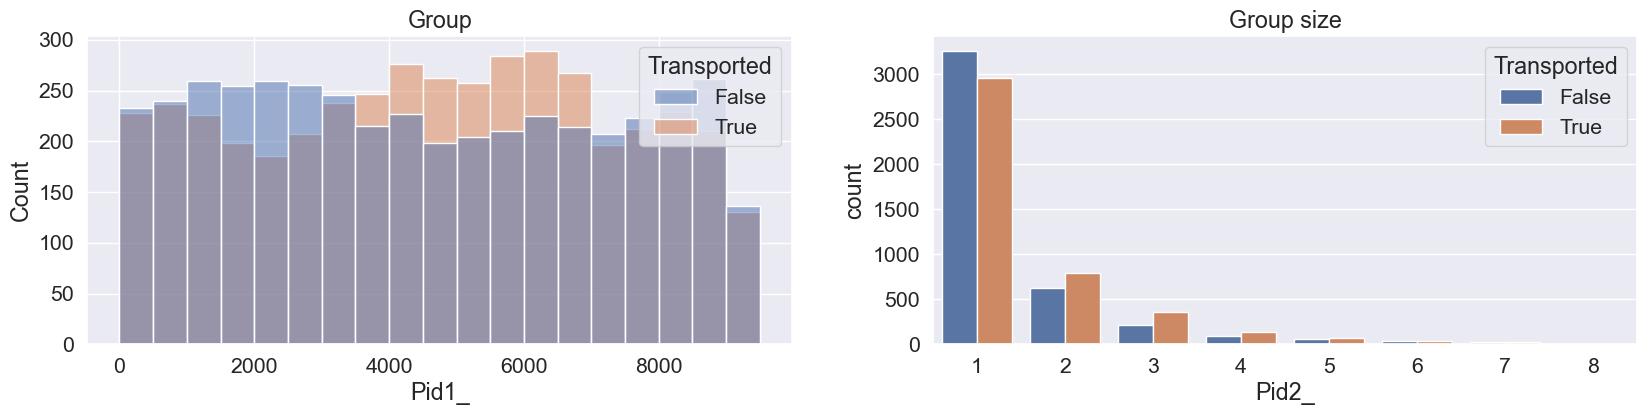

In [13]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Pid1_', hue='Transported', binwidth=500)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=train, x='Pid2_', hue='Transported')
plt.title('Group size')
fig.tight_layout()

In [14]:
tt[["Fname_", 'Lname_']] = tt["Name"].str.split(' ', expand=True)
tt.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'isTrain', 'Total_exp', 'Cabin_deck',
       'Cabin_num', 'Cabin_side', 'Pid1_', 'Pid2_', 'Fname_', 'Lname_'],
      dtype='object')

In [15]:
tt['Age_cat_'] = pd.cut(tt.Age,bins=[0, 5, 12, 18, 50, 150], labels=['Toddler/Baby','Child','Teen', 'Adult','Elderly'])
train['Age_cat_'] = pd.cut(train.Age,bins=[0, 5, 12, 18, 50, 150], labels=['Toddler/Baby','Child','Teen', 'Adult','Elderly'])
tt[['Age','Age_cat_']]

,Age,Age_cat_
0,39.0,Adult
1,24.0,Adult
2,58.0,Elderly
3,33.0,Adult
4,16.0,Teen
...,...,...
4272,34.0,Adult
4273,42.0,Adult
4274,NaN,NaN
4275,NaN,NaN


Text(0.5, 1.0, 'Age group distribution')

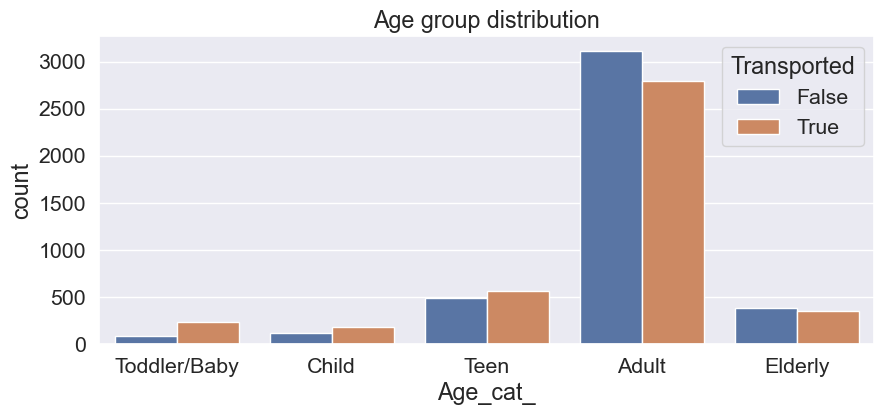

In [16]:
plt.figure(figsize=(10,4))
g=sns.countplot(data=train, x='Age_cat_', hue='Transported')
plt.title('Age group distribution')

In [17]:
numerical = tt.select_dtypes(exclude = ['object', 'category']).columns.to_list()
numerical

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Total_exp',
 'Pid1_',
 'Pid2_']

In [18]:
tt = tt.set_index('PassengerId')

In [19]:
tt = tt.drop(['Transported'], axis = 1)

In [20]:
categorical = tt.select_dtypes(['object', 'category']).columns.to_list()
categorical

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'isTrain',
 'Cabin_deck',
 'Cabin_num',
 'Cabin_side',
 'Fname_',
 'Lname_',
 'Age_cat_']

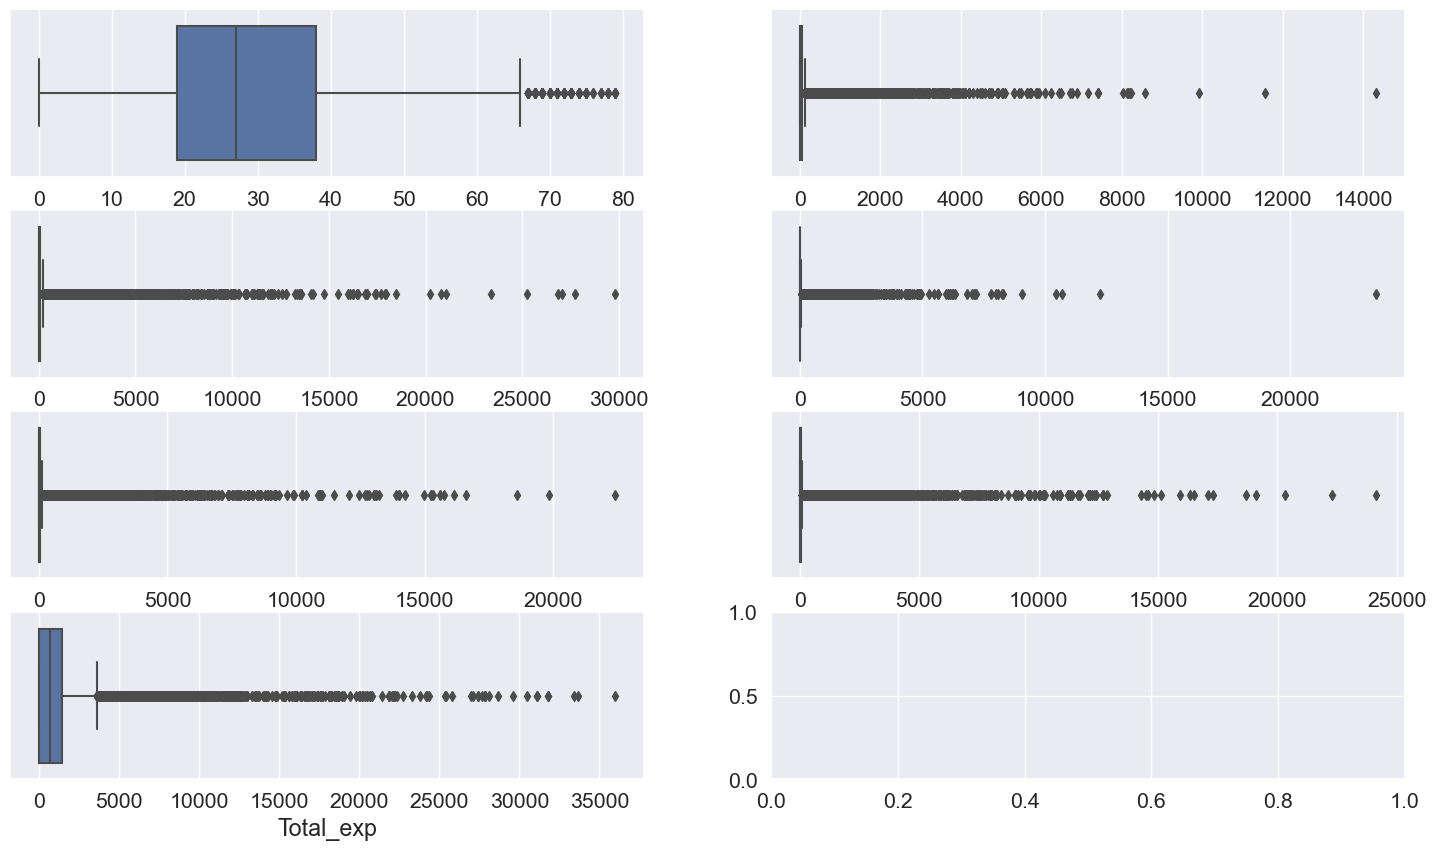

In [21]:
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_exp']
q, r =divmod((len(columns)//2)+1,1)
fig, ax=plt.subplots(q, 2, figsize=(18,10))
for i in range(0,len(columns)):
    q, r =divmod(i, 2)
    sns.boxplot(data=tt[numerical], x=columns[i], ax=ax[q, r])
plt.show()

In [22]:
from feature_engine.imputation import MeanMedianImputer
# set up the imputer
median_imputer = MeanMedianImputer(
                   imputation_method='median',
                   variables=numerical
                   )

# fit the imputer
median_imputer.fit(tt[numerical])


MeanMedianImputer(variables=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall',
                             'Spa', 'VRDeck', 'Total_exp', 'Pid1_', 'Pid2_'])

In [23]:
tt_num = median_imputer.transform(tt[numerical])
tt_num.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Total_exp       0
Pid1_           0
Pid2_           0
dtype: int64

In [24]:
from feature_engine import transformation as vt 
power_tf = vt.YeoJohnsonTransformer(variables = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_exp']) 
power_tf.fit(tt_num)
tt_num = power_tf.transform(tt_num) 
tt_num

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_exp,Pid1_,Pid2_
PassengerId,,,,,,,,,
0001_01,39.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,1,1
0002_01,24.0,1.966067,1.503098,1.628512,2.276893,1.833904,8.254936,2,1
0003_01,58.0,1.827066,2.399445,-0.000000,2.398930,1.852813,12.699557,3,1
0003_02,33.0,-0.000000,2.351861,1.930522,2.376085,2.031258,11.454708,3,2
0004_01,16.0,2.066423,2.042072,1.868522,2.279105,0.868915,8.867932,4,1
...,...,...,...,...,...,...,...,...,...
9266_02,34.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,9266,2
9269_01,42.0,-0.000000,2.326296,1.546722,1.534023,2.001459,8.758916,9269,1
9271_01,27.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,9271,1


In [25]:
tt_num['Age'] = tt_num['Age']/tt_num['Age'].mean()
tt_num['Age']

PassengerId
0001_01    1.357226
0002_01    0.835216
0003_01    2.018439
0003_02    1.148422
0004_01    0.556811
             ...   
9266_02    1.183223
9269_01    1.461628
9271_01    0.939618
9273_01    0.939618
9277_01    1.496429
Name: Age, Length: 12970, dtype: float64

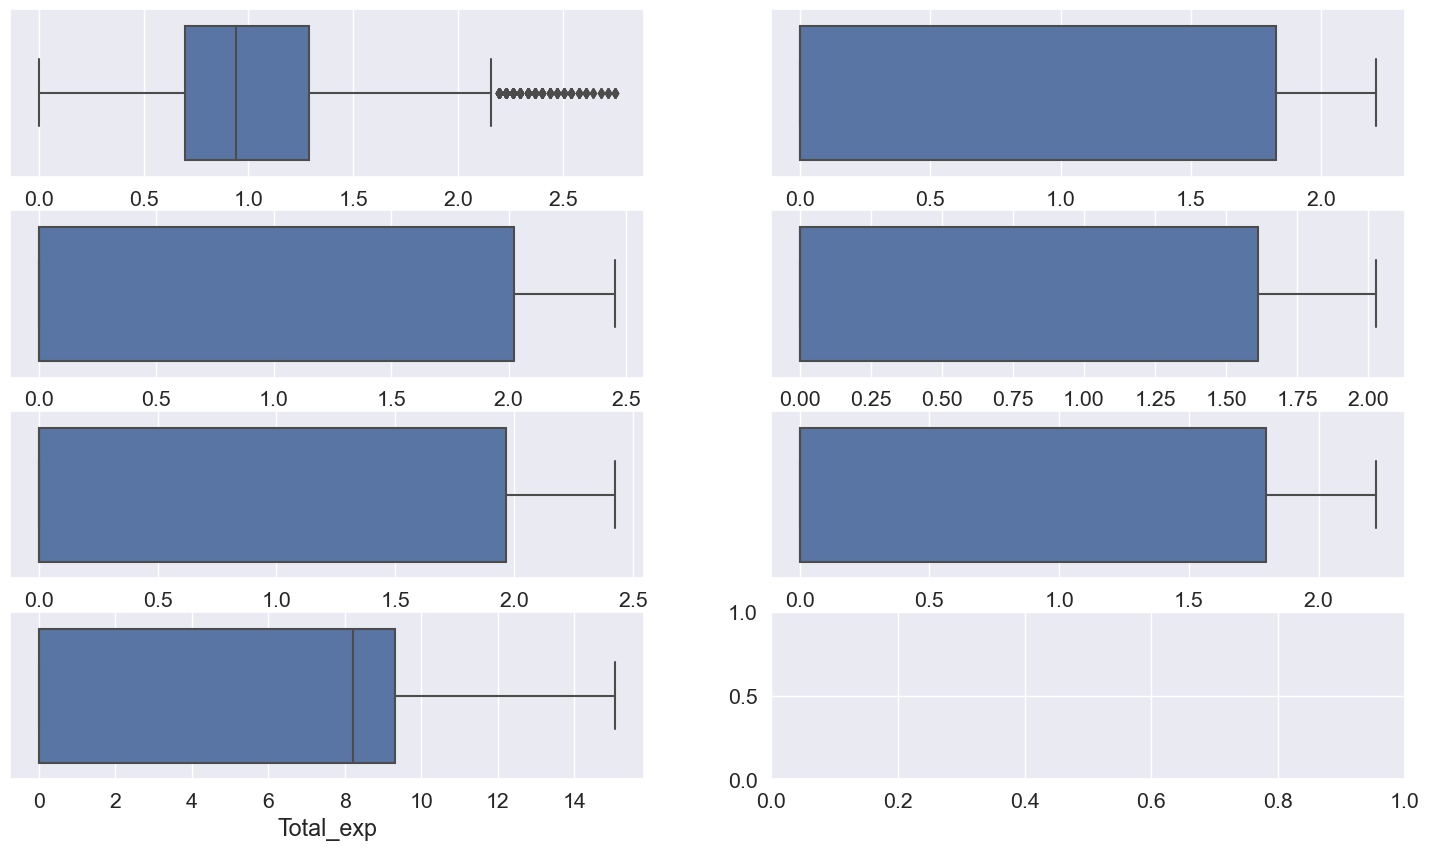

In [26]:
q, r = divmod((len(columns)//2)+1, 1)
fig, ax=plt.subplots(q, 2, figsize=(18,10))
for i in range(0,len(columns)):
    q, r = divmod(i, 2)
    sns.boxplot(data=tt_num, x=columns[i], ax=ax[q, r])
plt.show()

In [27]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [28]:
# fit the imputer
imp_mode.fit(tt[categorical])

# transform the data
tt_cat = imp_mode.transform(tt[categorical])
tt_cat = pd.DataFrame(tt_cat, columns = categorical, index = tt[categorical].index)
tt_cat.isna().sum()

HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
isTrain        0
Cabin_deck     0
Cabin_num      0
Cabin_side     0
Fname_         0
Lname_         0
Age_cat_       0
dtype: int64

In [29]:
tt_imputed = pd.concat([tt_cat, tt_num],axis = 1)
tt_imputed.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
Name            0
isTrain         0
Cabin_deck      0
Cabin_num       0
Cabin_side      0
Fname_          0
Lname_          0
Age_cat_        0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Total_exp       0
Pid1_           0
Pid2_           0
dtype: int64

In [30]:
tt_imputed[["CryoSleep", 'VIP']] = tt_imputed[["CryoSleep", 'VIP']].astype('bool').astype(int)

In [31]:
X = tt_imputed[tt_imputed['isTrain'] == 'Yes'] #X=train
X = X.drop('isTrain', axis = 1)
X

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Cabin_deck,Cabin_num,Cabin_side,Fname_,...,Age_cat_,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_exp,Pid1_,Pid2_
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,0,B/0/P,TRAPPIST-1e,0,Maham Ofracculy,B,0,P,Maham,...,Adult,1.357226,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,1,1
0002_01,Earth,0,F/0/S,TRAPPIST-1e,0,Juanna Vines,F,0,S,Juanna,...,Adult,0.835216,1.966067,1.503098,1.628512,2.276893,1.833904,8.254936,2,1
0003_01,Europa,0,A/0/S,TRAPPIST-1e,1,Altark Susent,A,0,S,Altark,...,Elderly,2.018439,1.827066,2.399445,-0.000000,2.398930,1.852813,12.699557,3,1
0003_02,Europa,0,A/0/S,TRAPPIST-1e,0,Solam Susent,A,0,S,Solam,...,Adult,1.148422,-0.000000,2.351861,1.930522,2.376085,2.031258,11.454708,3,2
0004_01,Earth,0,F/1/S,TRAPPIST-1e,0,Willy Santantines,F,1,S,Willy,...,Teen,0.556811,2.066423,2.042072,1.868522,2.279105,0.868915,8.867932,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,0,A/98/P,55 Cancri e,1,Gravior Noxnuther,A,98,P,Gravior,...,Adult,1.426827,-0.000000,2.420796,-0.000000,2.345516,1.917845,12.343533,9276,1
9278_01,Earth,1,G/1499/S,PSO J318.5-22,0,Kurta Mondalley,G,1499,S,Kurta,...,Teen,0.626412,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,9278,1
9279_01,Earth,0,G/1500/S,TRAPPIST-1e,0,Fayey Connon,G,1500,S,Fayey,...,Adult,0.904817,-0.000000,-0.000000,1.992184,0.604332,-0.000000,9.736010,9279,1


In [32]:
y = train.set_index('PassengerId')['Transported'].astype('bool').astype(int)
y

PassengerId
0001_01    0
0002_01    1
0003_01    0
0003_02    0
0004_01    1
          ..
9276_01    0
9278_01    0
9279_01    1
9280_01    0
9280_02    1
Name: Transported, Length: 8693, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)

In [34]:
categorical = X.select_dtypes('object', 'category').columns.to_list()
categorical

['HomePlanet',
 'Cabin',
 'Destination',
 'Name',
 'Cabin_deck',
 'Cabin_num',
 'Cabin_side',
 'Fname_',
 'Lname_',
 'Age_cat_']

In [35]:
X_label = X.copy()
for col in categorical:
    X_label[col] = X_label[col].astype("category").cat.codes.astype("category")
X_label[categorical].head()

,HomePlanet,Cabin,Destination,Name,Cabin_deck,Cabin_num,Cabin_side,Fname_,Lname_,Age_cat_
PassengerId,,,,,,,,,,
0001_01,1,149,2,5252,1,0,0,1614,1431,0
0002_01,0,2184,2,4502,5,0,1,1407,2109,0
0003_01,1,1,2,457,0,0,1,156,1990,2
0003_02,1,1,2,7149,0,0,1,2276,1990,0
0004_01,0,2186,2,8319,5,1,1,2642,1778,3


In [36]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [37]:
from sklearn.pipeline import Pipeline

pipeline_dt=Pipeline([('GaussianNB',GaussianNB())])
pipeline_knn=Pipeline([('KNeighborsClassifier',KNeighborsClassifier())])
pipeline_rf=Pipeline([ ('RandomForestClassifier',RandomForestClassifier())])
pipeline_dt=Pipeline([ ('DecisionTreeClassifier',DecisionTreeClassifier())])
pipeline_xgb=Pipeline([ ('XGBClassifier',XGBClassifier(enable_categorical = True, tree_method =  "hist"))])
pipeline_lgr=Pipeline([ ('LogisticRegression',LogisticRegression(solver='lbfgs', max_iter=3000))])
pipeline_lgbm=Pipeline([ ('LGBMClassifier',LGBMClassifier(objective='binary'))])
pipeline_catB=Pipeline([ ('CatBoostClassifier',CatBoostClassifier( verbose = 0, cat_features = categorical))])
pipeline_adaB=Pipeline([ ('AdaBoostClassifier',AdaBoostClassifier())])

pipelines = [pipeline_dt, pipeline_knn, pipeline_rf,pipeline_dt,pipeline_xgb , pipeline_lgr , pipeline_lgbm , pipeline_catB , pipeline_adaB]
pipe_dict = {0: 'GaussianNB', 1: 'KNeighborsClassifier', 2: 'RandomForestClassifier',
             3: 'DecisionTreeClassifier',4: 'XGBClassifier' , 5 : 'LogisticRegression' ,
             6 : 'LGBMClassifier' , 7 : 'CatBoostClassifier' ,8 : 'AdaBoostClassifier'}

In [38]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_label, y, test_size=0.20, random_state=101, stratify=y)

In [39]:
from sklearn.metrics import accuracy_score

original_results = dict()
for i, model in enumerate(pipelines):
    model.fit(X_train_c, y_train_c)
    score = accuracy_score(y_test_c, model.predict(X_test_c))
    #cv_score = cross_val_score(model, X_train,y_train, cv=3 ,scoring='accuracy').mean()
    #print(model.get_params())
    original_results[pipe_dict[i]] = score

/Users/suthatipchaithap/miniforge3/envs/env_tf/lib/python3.9/site-packages/catboost/core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [40]:
for key , value in sorted(original_results.items(),key=lambda item : item[1]):
    print(key , value)

KNeighborsClassifier 0.5554916618746406
XGBClassifier 0.5704427832087406
GaussianNB 0.7475560667050029
DecisionTreeClassifier 0.7527314548591144
LogisticRegression 0.7596319723979299
AdaBoostClassifier 0.80448533640023
RandomForestClassifier 0.8090856814261069
LGBMClassifier 0.81196089706728
CatBoostClassifier 0.8159861989649224


In [41]:
import shap
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class FSwithShap():

    def __init__(self, X, y):
        self.X = X
        self.y = y 
        self.acc = []

    def build_model(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
        # Identify the categorical features
        categorical_features = X_train.select_dtypes(exclude=[np.number]).columns.to_list()
        # Create training and test pools for catboost
        train_pool = Pool(X_train, y_train, categorical_features)
        test_pool = Pool(X_test, y_test, categorical_features)
        # Fit the model and calculate RMSE
        model = CatBoostClassifier(random_state=101,
                              n_estimators=10000,
                              loss_function='CrossEntropy',  
                              eval_metric="Logloss",
                              task_type="CPU", verbose = False)
        
        model.fit(X_train, y_train, eval_set=test_pool, cat_features=categorical_features, use_best_model=True, early_stopping_rounds=100)
        cat_acc = accuracy_score(y_test, model.predict(X_test))
        return cat_acc, model, X_test

    def get_dropped_feature(self, model, X_test):
        explainer = shap.Explainer(model)
        shap_values = explainer(X_test)
        feature_importance = shap_values.abs.mean(0).values
        importance_df = pd.DataFrame({'features': X_test.columns,
                                      'importance': feature_importance})
        importance_df.sort_values(by='importance', ascending=False, inplace=True)
        return importance_df['features'].iloc[-1]
        
    def backward_selection(self, X, y, max_features=None):

        # get baseline RMSE
        select_df = X.copy()
        total_features = X.shape[1]
        cat_acc, model, X_test = self.build_model(select_df, y)
        self.acc.append(cat_acc)
        print(f"{cat_acc} with {select_df.shape[1]}")
        last_cat_acc = cat_acc
         
        # Drop least important feature and recalculate model peformance
        if max_features is None:
            max_features = total_features-1
            
        for num_features in range(total_features-1, 1, -1):
            dropped_feature = self.get_dropped_feature(model, X_test)
            tmp_df = select_df.drop(columns=[dropped_feature])

            cat_acc, model, X_test = self.build_model(tmp_df, y)
            print(f"{cat_acc} with {tmp_df.shape[1]}")
            if (num_features < max_features) and (cat_acc > last_cat_acc):
                return select_df
            if (cat_acc < 0.81387 * 0.99):
                break
            else:
                last_cat_acc = cat_acc
                select_df = tmp_df
        return select_df

In [42]:
P = FSwithShap(X, y)
X_ = P.backward_selection(X, y, max_features =1)

iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8159861989649224 with 21


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8154111558366878 with 20


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.81943645773433 with 19


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8171362852213916 with 18


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.816561242093157 with 17


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8182863714778609 with 16


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8159861989649224 with 15


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8159861989649224 with 14


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8188614146060954 with 13


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8223116733755031 with 12


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8269120184013801 with 11


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.821161587119034 with 10


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8246118458884416 with 9


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8269120184013801 with 8


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.821161587119034 with 7


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8171362852213916 with 6


iteritems is deprecated and will be removed in a future version. Use .items instead.


0.8016101207590569 with 5


In [43]:
col = X_.columns 
col

Index(['HomePlanet', 'Cabin_deck', 'RoomService', 'Spa', 'VRDeck',
       'Total_exp'],
      dtype='object')

In [44]:
X_

,HomePlanet,Cabin_deck,RoomService,Spa,VRDeck,Total_exp
PassengerId,,,,,,
0001_01,Europa,B,-0.000000,-0.000000,-0.000000,0.000000
0002_01,Earth,F,1.966067,2.276893,1.833904,8.254936
0003_01,Europa,A,1.827066,2.398930,1.852813,12.699557
0003_02,Europa,A,-0.000000,2.376085,2.031258,11.454708
0004_01,Earth,F,2.066423,2.279105,0.868915,8.867932
...,...,...,...,...,...,...
9276_01,Europa,A,-0.000000,2.345516,1.917845,12.343533
9278_01,Earth,G,-0.000000,-0.000000,-0.000000,0.000000
9279_01,Earth,G,-0.000000,0.604332,-0.000000,9.736010


In [45]:
import optuna


def cat_roc_objective(trial):
    param = {
      'max_leaves': trial.suggest_int('max_leaves', 20, 150),
      'max_depth': trial.suggest_int('max_depth', 5, 30),
      'learning_rate': trial.suggest_loguniform("learning_rate", 0.001, 0.1),
      'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 30),
      'iterations': trial.suggest_int('n_estimators', 800, 5000)
    }

    fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2202)
    cv_scores = []
    for train_idx, val_idx in fold.split(X_, y):
        X_tr, X_val = X_.iloc[train_idx], X_.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        categorical = X_tr.select_dtypes('object', 'category').columns.to_list()
        train_dataset = Pool(X_tr,y_tr, cat_features=categorical)
        test_dataset = Pool(X_val,y_val, cat_features=categorical)

        model = CatBoostClassifier(**param, grow_policy='Lossguide', task_type='CPU', random_state=42, silent=True)
        model.fit(train_dataset, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=False)
        y_pred_proba = model.predict(X_val)
        score = accuracy_score(y_val, y_pred_proba)

        cv_scores.append(score)

    return np.mean(cv_scores)

cat_roc_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
cat_roc_study.optimize(cat_roc_objective, n_trials=20)

cat_roc_best = cat_roc_study.best_trial
cat_roc_best_params = cat_roc_best.params
print('score: {0}, params: {1}'.format(cat_roc_best.value, cat_roc_best_params))

[I 2022-10-30 21:04:52,791] A new study created in memory with name: no-name-2593ba53-faab-46ab-bce1-eb5f24081484
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
iteritems is deprecated and will be removed in a future version. Use .items instead.
iteritems is deprecated and will be removed in a future version. Use .items instead.
iteritems is deprecated and will be removed in a future version. Use .items instead.
iteritems is deprecated and will be removed in a future version. Use .items instead.
iteritems is deprecated and will be removed in a future version. Use .items instead.
[I 2022-10-30 21:05:10,497] Trial 0 finished with value: 0.8058220304382437 and parameters: {'max_leaves': 69, 'max_depth': 29, 'learning_rate': 0.029106359131330698, 'min_data_in_leaf': 18, 'n_estimators': 1455}. Best is trial 0 with value: 0.80582203043824

score: 0.80685783597176, params: {'max_leaves': 22, 'max_depth': 24, 'learning_rate': 0.02729024078792152, 'min_data_in_leaf': 7, 'n_estimators': 4620}


In [46]:
optuna.visualization.plot_optimization_history(cat_roc_study)

In [47]:
cat_roc_best_params

{'max_leaves': 22,
 'max_depth': 24,
 'learning_rate': 0.02729024078792152,
 'min_data_in_leaf': 7,
 'n_estimators': 4620}

In [48]:
N_SPLITS = 5
strat_kf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=101)

scores = np.empty(N_SPLITS)

for idx, (train_idx, test_idx) in enumerate(strat_kf.split(X_, y)):
    
    print("=" * 12 + f" Training fold {idx} " + 12 * "=")

    X_train, X_test = X_.iloc[train_idx], X_.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    categorical = X_train.select_dtypes(object, 'category').columns.to_list()
    
    train_dataset = Pool(X_train,y_train, 
                         cat_features=categorical
                        )
    test_dataset = Pool(X_test,y_test,
                        cat_features=categorical
                       )

    cb_clf = CatBoostClassifier(grow_policy='Lossguide', 
                               task_type='CPU', random_state=42, silent=True,
                                 **cat_roc_best_params)
    
    
    cb_clf.fit(train_dataset, eval_set=[(X_test, y_test)],
               early_stopping_rounds=50, verbose=False)
    
    
    preds = cb_clf.predict(X_test)
    loss = accuracy_score(y_test, preds)
    scores[idx] = loss
    print(f"Fold {idx} finished with score: {loss:.5f}.\n")
    
print(f"mean score: {scores.mean():.5f}.\n")

============ Training fold 0 ============


/Users/suthatipchaithap/miniforge3/envs/env_tf/lib/python3.9/site-packages/catboost/core.py:1419: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Fold 0 finished with score: 0.81886.

============ Training fold 1 ============


/Users/suthatipchaithap/miniforge3/envs/env_tf/lib/python3.9/site-packages/catboost/core.py:1419: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Fold 1 finished with score: 0.80219.

============ Training fold 2 ============


/Users/suthatipchaithap/miniforge3/envs/env_tf/lib/python3.9/site-packages/catboost/core.py:1419: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Fold 2 finished with score: 0.79758.

============ Training fold 3 ============


/Users/suthatipchaithap/miniforge3/envs/env_tf/lib/python3.9/site-packages/catboost/core.py:1419: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Fold 3 finished with score: 0.80725.

============ Training fold 4 ============


/Users/suthatipchaithap/miniforge3/envs/env_tf/lib/python3.9/site-packages/catboost/core.py:1419: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Fold 4 finished with score: 0.80150.

mean score: 0.80548.



In [49]:
subb = pd.read_csv('sample_submission.csv')
subb

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [50]:
test = tt_imputed[tt_imputed['isTrain'] == 'No']
test = test.drop('isTrain', axis = 1)
test

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Cabin_deck,Cabin_num,Cabin_side,Fname_,...,Age_cat_,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_exp,Pid1_,Pid2_
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,Earth,1,G/3/S,TRAPPIST-1e,0,Nelly Carsoning,G,3,S,Nelly,...,Adult,0.939618,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,13,1
0018_01,Earth,0,F/4/S,TRAPPIST-1e,0,Lerome Peckers,F,4,S,Lerome,...,Adult,0.661213,-0.000000,1.503098,-0.000000,2.369708,-0.000000,10.421260,18,1
0019_01,Europa,1,C/0/S,55 Cancri e,0,Sabih Unhearfus,C,0,S,Sabih,...,Adult,1.078821,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,19,1
0021_01,Europa,0,C/1/S,TRAPPIST-1e,0,Meratz Caltilter,C,1,S,Meratz,...,Adult,1.322425,-0.000000,2.420074,-0.000000,2.168633,2.114963,12.091166,21,1
0023_01,Earth,0,F/5/S,TRAPPIST-1e,0,Brence Harperez,F,5,S,Brence,...,Adult,0.696013,1.472411,-0.000000,1.956562,-0.000000,-0.000000,8.052965,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,1,G/1496/S,TRAPPIST-1e,0,Jeron Peter,G,1496,S,Jeron,...,Adult,1.183223,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,9266,2
9269_01,Earth,0,G/160/P,TRAPPIST-1e,0,Matty Scheron,F,82,S,Matty,...,Adult,1.461628,-0.000000,2.326296,1.546722,1.534023,2.001459,8.758916,9269,1
9271_01,Mars,1,D/296/P,55 Cancri e,0,Jayrin Pore,D,296,P,Jayrin,...,Adult,0.939618,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,9271,1


In [51]:
test = test[col]
test

,HomePlanet,Cabin_deck,RoomService,Spa,VRDeck,Total_exp
PassengerId,,,,,,
0013_01,Earth,G,-0.000000,-0.000000,-0.000000,0.000000
0018_01,Earth,F,-0.000000,2.369708,-0.000000,10.421260
0019_01,Europa,C,-0.000000,-0.000000,-0.000000,0.000000
0021_01,Europa,C,-0.000000,2.168633,2.114963,12.091166
0023_01,Earth,F,1.472411,-0.000000,-0.000000,8.052965
...,...,...,...,...,...,...
9266_02,Earth,G,-0.000000,-0.000000,-0.000000,0.000000
9269_01,Earth,F,-0.000000,1.534023,2.001459,8.758916
9271_01,Mars,D,-0.000000,-0.000000,-0.000000,0.000000


In [52]:
preds = cb_clf.predict(test)
preds

/Users/suthatipchaithap/miniforge3/envs/env_tf/lib/python3.9/site-packages/catboost/core.py:1419: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



array([1, 0, 1, ..., 1, 1, 1])

In [53]:
preds = preds.astype('bool')
preds

array([ True, False,  True, ...,  True,  True,  True])

In [54]:
subb.Transported = preds
subb

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [55]:
subb.to_csv('submission.csv', index = None)